<a href="https://colab.research.google.com/github/hollyisyoon/TIL/blob/main/%5B%EC%9C%A4%ED%9B%88%EC%98%81%5D_mid_%EC%84%B1%EB%8A%A5%EA%B0%9C%EC%84%A0_1%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
test = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/원본/test.csv')
train = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/원본/train.csv')
sub = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/원본/sample_submission.csv')
holiday = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/16_22공휴일.csv')
df = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/제출용/훈영_train+test.csv')

In [ ]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.0 MB/s eta 0:00:00


In [ ]:
df = pd.concat([train, test], axis=0)
df['본사근무자수']=df['본사정원수']-df['본사휴가자수']-df['본사출장자수']-df['현본사소속재택근무자수']
# df['근무대비중식계']=df['중식계']/df['본사근무자수']
# df['근무대비석식계']=df['석식계']/df['본사근무자수']
df['일자'] = pd.to_datetime(df['일자'])
# df['년'] = df['일자'].dt.year
# df['월'] = df['일자'].dt.month
# df['일'] = df['일자'].dt.day
# df['주'] = df['일자'].dt.week

In [ ]:
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0


In [ ]:
#공휴일 21.04.09까지 
holiday = holiday.iloc[1:82,[0,5]]
holiday['날짜'] = pd.to_datetime(holiday['날짜'])
holiday

,날짜,공휴일
1,2016-02-07,설날 연휴
2,2016-02-08,설날
3,2016-02-09,설날 연휴
4,2016-03-01,3·1절
5,2016-05-05,어린이날
...,...,...
77,2021-01-01,신정(양력설)
78,2021-02-11,설날 연휴
79,2021-02-12,설날
80,2021-02-13,설날 연휴


## 공휴일 데이터 개선

In [ ]:
import datetime 
import pandas as pd 
start_d = datetime.date(2021,1,27)
end_d = datetime.date(2021,4,9)
dates = pd.date_range(start=start_d, end=end_d, freq='B')
notnull = pd.DataFrame({'일자':dates})
notnull.head(3)

,일자
0,2021-01-27
1,2021-01-28
2,2021-01-29


In [ ]:
test['일자'] = pd.to_datetime(test['일자'])

In [ ]:
pd.merge(notnull, test, how='left') #설날, 31절 공휴일 데이터가 들어있다

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983.0,88.0,182.0,5.0,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983.0,104.0,212.0,409.0,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983.0,270.0,249.0,0.0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924.0,108.0,154.0,538.0,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924.0,62.0,186.0,455.0,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2021-02-03,수,2924.0,59.0,199.0,5.0,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2021-02-04,목,2924.0,61.0,211.0,476.0,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2021-02-05,금,2924.0,169.0,252.0,0.0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2021-02-08,월,2924.0,88.0,174.0,690.0,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2021-02-09,화,2924.0,94.0,183.0,542.0,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


In [ ]:
#test, train셋 2016-02-01 ~ 2021-04-09
#공휴일 데이터를 이번에는 join으로 열을 채우지 말고, 기존 데이터에서 (평일에) 비어있는 날들을 확인하고 계산해주자 -> 법적공휴일이 아닌 날들을 포함할 수 있다
#월, 금요일이 낀 공휴일에는 가중치를 주자

start_d = datetime.date(2016,2,1)
end_d = datetime.date(2021,4,9)
dates = pd.date_range(start=start_d, end=end_d, freq='B')
all_date = pd.DataFrame({'일자':dates})

In [ ]:
df_all = pd.merge(all_date, df, how='left')
df_all['요일'].isnull().sum() 
#공휴일 외에도 코로나로 인해 식당을 잠정중단한 날짜가 포함되어있다 
#식당이 잠정중단된 이유 (1)코로나로 인한 중단-본사근무자 수에는 변동이 없었을 것 (2)공휴일&휴가-본사근무자 수에도 변화가 있었을 것
#공휴일 데이터를 포함하여 결측치가 있었던 행은 공휴일이라고 판단하고, 기존 년도와 비교하여 중복된 null값이 있는 행은 공휴일로 한다

100

In [ ]:
all_holiday = df_all[df_all['요일'].isnull()]
df_all_holiday = pd.merge(all_holiday, holiday, how='left', left_on='일자', right_on='날짜')
df_all_holiday['요일2'] = df_all_holiday['일자'].dt.dayofweek
df_all_holiday

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,날짜,공휴일,요일2
0,2016-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-08,설날,0
1,2016-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-09,설날 연휴,1
2,2016-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2
3,2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-01,3·1절,1
4,2016-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,3
97,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,신정(양력설),4
98,2021-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-11,설날 연휴,3
99,2021-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-12,설날,4


In [ ]:
df_all_holiday['월일'] = df_all_holiday['일자'].dt.strftime('%m-%d')
temp = df_all_holiday.groupby(['월일'])['일자'].count()
indices = temp[temp >= 2].index
indices #2회이상 휴무가 있었던 일임으로 공휴일에 포함되어있지 않은 날짜라면 포함되도록 설정하자 10/1은 회사 창립기념일로 보인다

Index(['01-01', '01-27', '03-01', '05-01', '05-05', '05-06', '06-06', '08-15',
       '10-01', '10-02', '10-03', '10-04', '10-05', '10-09', '12-25'],
      dtype='object', name='월일')

In [ ]:
mask = (df_all_holiday['월일'].isin(indices)) & (df_all_holiday['공휴일'].isnull())
df_all_holiday.loc[mask,'공휴일'] = '중복 날짜'
df_all_holiday = df_all_holiday[['일자', '공휴일']]

In [ ]:
temp2 = pd.merge(df_all, df_all_holiday, how='left')
#temp2['공휴일']에 값이 있으면 index값 기준으로 위 아래 행에 휴무-1, 휴무+1 값을 할당해준다
idx = temp2[temp2['공휴일'].notnull()].index
temp2.loc[idx - 2, '공휴일'] = '휴무-2'
temp2.loc[idx - 1, '공휴일'] = '휴무-1'
temp2.loc[idx + 1, '공휴일'] = '휴무+1'
temp2.loc[idx + 2, '공휴일'] = '휴무+2'
temp2

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,공휴일
0,2016-02-01,월,2601.0,50.0,150.0,238.0,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,NaN
1,2016-02-02,화,2601.0,50.0,173.0,319.0,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,NaN
2,2016-02-03,수,2601.0,56.0,180.0,111.0,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,휴무-2
3,2016-02-04,목,2601.0,104.0,220.0,355.0,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,휴무-1
4,2016-02-05,금,2601.0,278.0,181.0,34.0,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,휴무-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,2021-04-05,월,2973.0,125.0,174.0,704.0,331.0,모닝롤/커피콩빵 우유/주스 계란후라이 누룽지탕/흑미밥 청양콩나물국 스팸구이 양상추샐...,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비 오지치즈후라이 가지두반장볶음 포기김치 ...,흑미밥 돈육고추장찌개 갈치구이 김치전 취나물무침 깍두기,NaN,NaN,2343.0,NaN
1351,2021-04-06,화,2973.0,76.0,170.0,636.0,364.0,모닝롤/모닝샌드 우유/주스 계란후라이 고구마스프/흑미밥 아욱국 참치채소볶음 양상추샐...,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜 깻잎완자전 돌나물초장무침 포기김치 시리...,추가밥 짬뽕*생면 수제찹쌀꿔바로우 메추리알곤약장조림 단무지무침 포기김치,NaN,NaN,2363.0,NaN
1352,2021-04-07,수,2973.0,96.0,214.0,1.0,334.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 팥죽/흑미밥 닭살해장국 우엉채조림 양상추샐러...,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기 비빔냉면 오이나물볶음 겉절이김치 양상추샐...,단호박카레라이스 시금치된장국 소떡소떡 파프리카해초무침 감귤쥬스 포기김치,NaN,NaN,2329.0,NaN
1353,2021-04-08,목,2973.0,105.0,238.0,509.0,324.0,모닝롤/크로크무슈 우유/주스 계란후라이 누룽지탕/흑미밥 감자국 두부양념조림 양상추샐...,쌀밥/옥수수밥/찰현미밥 맑은떡국 (New)로제찜닭 가자미구이*장 유채나물무침 포기김...,흑미밥 어묵매운탕 쇠고기숙주볶음 채소계란찜 쑥갓생무침 김치볶음,NaN,NaN,2306.0,NaN


In [ ]:
df_all_holiday = temp2[temp2['중식메뉴'].notnull()]
df_all_holiday.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,공휴일
0,2016-02-01,월,2601.0,50.0,150.0,238.0,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,NaN
1,2016-02-02,화,2601.0,50.0,173.0,319.0,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,NaN
2,2016-02-03,수,2601.0,56.0,180.0,111.0,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,휴무-2
3,2016-02-04,목,2601.0,104.0,220.0,355.0,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,휴무-1
4,2016-02-05,금,2601.0,278.0,181.0,34.0,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,휴무-1


In [ ]:
dataset['일자'] = pd.to_datetime(dataset['일자'])

In [ ]:
df = pd.merge(dataset, df_all_holiday, on='일자', how='left')
df.columns

Index(['Unnamed: 0', '일자', '중식_밥', '중식_국', '중식_메인', '석식_밥', '석식_국', '석식_메인',
       '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
       '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '본사근무자수', '공휴일'],
      dtype='object')

In [ ]:
df = df[['일자', '공휴일', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '본사근무자수', '중식_밥', '중식_국', '중식_메인', '석식_밥', '석식_국', '석식_메인', '중식계', '석식계']]
df

,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식_밥,중식_국,중식_메인,석식_밥,석식_국,석식_메인,중식계,석식계
0,2016-02-01,NaN,월,2601.0,50.0,150.0,238.0,0.0,2401.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이,1039.0,331.0
1,2016-02-02,NaN,화,2601.0,50.0,173.0,319.0,0.0,2378.0,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬,867.0,560.0
2,2016-02-03,휴무-2,수,2601.0,56.0,180.0,111.0,0.0,2365.0,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이,1017.0,573.0
3,2016-02-04,휴무-1,목,2601.0,104.0,220.0,355.0,0.0,2277.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드,978.0,525.0
4,2016-02-05,휴무-1,금,2601.0,278.0,181.0,34.0,0.0,2142.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비,925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2021-04-05,NaN,월,2973.0,125.0,174.0,704.0,331.0,2343.0,쌀밥/흑미밥/찰현미밥,쇠고기미역국,춘천닭갈비,흑미밥,돈육고추장찌개,갈치구이,NaN,NaN
1251,2021-04-06,NaN,화,2973.0,76.0,170.0,636.0,364.0,2363.0,쌀밥/귀리밥/찰현미밥,순두부백탕,매콤소갈비찜,추가밥,짬뽕*생면,수제찹쌀꿔바로우,NaN,NaN
1252,2021-04-07,NaN,수,2973.0,96.0,214.0,1.0,334.0,2329.0,쌀밥/흑미밥/찰현미밥,냉이국,돈육간장불고기,단호박카레라이스,시금치된장국,소떡소떡,NaN,NaN
1253,2021-04-08,NaN,목,2973.0,105.0,238.0,509.0,324.0,2306.0,쌀밥/옥수수밥/찰현미밥,맑은떡국,가자미구이,흑미밥,어묵매운탕,쇠고기숙주볶음,NaN,NaN


In [ ]:
def menu_processing(df, col):
    rice = []
    for row in df[col].values:
        df[col] = df[col].fillna('')
        if isinstance(row, float):
            continue  # Skip float values
        elif '/' in row:
            rice.append(row.split('/')[0].strip())
        elif '*' in row:
            try: 
                rice.append(row.split('*')[0].strip())
            except:
                rice.append(str(row).split('*')[0].strip())
        else:
            try:
                rice.append(row.strip())
            except:
                rice.append(row)
    df[col] = rice
    return df

In [ ]:
menu_processing(df, '중식_밥')

,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식_밥,중식_국,중식_메인,석식_밥,석식_국,석식_메인,중식계,석식계
0,2016-02-01,NaN,월,2601.0,50.0,150.0,238.0,0.0,2401.0,쌀밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이,1039.0,331.0
1,2016-02-02,NaN,화,2601.0,50.0,173.0,319.0,0.0,2378.0,쌀밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬,867.0,560.0
2,2016-02-03,휴무-2,수,2601.0,56.0,180.0,111.0,0.0,2365.0,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이,1017.0,573.0
3,2016-02-04,휴무-1,목,2601.0,104.0,220.0,355.0,0.0,2277.0,쌀밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드,978.0,525.0
4,2016-02-05,휴무-1,금,2601.0,278.0,181.0,34.0,0.0,2142.0,쌀밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비,925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2021-04-05,NaN,월,2973.0,125.0,174.0,704.0,331.0,2343.0,쌀밥,쇠고기미역국,춘천닭갈비,흑미밥,돈육고추장찌개,갈치구이,NaN,NaN
1251,2021-04-06,NaN,화,2973.0,76.0,170.0,636.0,364.0,2363.0,쌀밥,순두부백탕,매콤소갈비찜,추가밥,짬뽕*생면,수제찹쌀꿔바로우,NaN,NaN
1252,2021-04-07,NaN,수,2973.0,96.0,214.0,1.0,334.0,2329.0,쌀밥,냉이국,돈육간장불고기,단호박카레라이스,시금치된장국,소떡소떡,NaN,NaN
1253,2021-04-08,NaN,목,2973.0,105.0,238.0,509.0,324.0,2306.0,쌀밥,맑은떡국,가자미구이,흑미밥,어묵매운탕,쇠고기숙주볶음,NaN,NaN


In [ ]:
menu_processing(df, '석식_밥')

,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식_밥,중식_국,중식_메인,석식_밥,석식_국,석식_메인,중식계,석식계
0,2016-02-01,NaN,월,2601.0,50.0,150.0,238.0,0.0,2401.0,쌀밥,오징어찌개,쇠불고기,쌀밥,육개장,자반고등어구이,1039.0,331.0
1,2016-02-02,NaN,화,2601.0,50.0,173.0,319.0,0.0,2378.0,쌀밥,김치찌개,가자미튀김,콩나물밥,어묵국,유산슬,867.0,560.0
2,2016-02-03,휴무-2,수,2601.0,56.0,180.0,111.0,0.0,2365.0,카레덮밥,팽이장국,치킨핑거,쌀밥,청국장찌개,황태양념구이,1017.0,573.0
3,2016-02-04,휴무-1,목,2601.0,104.0,220.0,355.0,0.0,2277.0,쌀밥,쇠고기무국,주꾸미볶음,미니김밥,우동,멕시칸샐러드,978.0,525.0
4,2016-02-05,휴무-1,금,2601.0,278.0,181.0,34.0,0.0,2142.0,쌀밥,떡국,돈육씨앗강정,쌀밥,차돌박이찌개,닭갈비,925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2021-04-05,NaN,월,2973.0,125.0,174.0,704.0,331.0,2343.0,쌀밥,쇠고기미역국,춘천닭갈비,흑미밥,돈육고추장찌개,갈치구이,NaN,NaN
1251,2021-04-06,NaN,화,2973.0,76.0,170.0,636.0,364.0,2363.0,쌀밥,순두부백탕,매콤소갈비찜,추가밥,짬뽕*생면,수제찹쌀꿔바로우,NaN,NaN
1252,2021-04-07,NaN,수,2973.0,96.0,214.0,1.0,334.0,2329.0,쌀밥,냉이국,돈육간장불고기,단호박카레라이스,시금치된장국,소떡소떡,NaN,NaN
1253,2021-04-08,NaN,목,2973.0,105.0,238.0,509.0,324.0,2306.0,쌀밥,맑은떡국,가자미구이,흑미밥,어묵매운탕,쇠고기숙주볶음,NaN,NaN


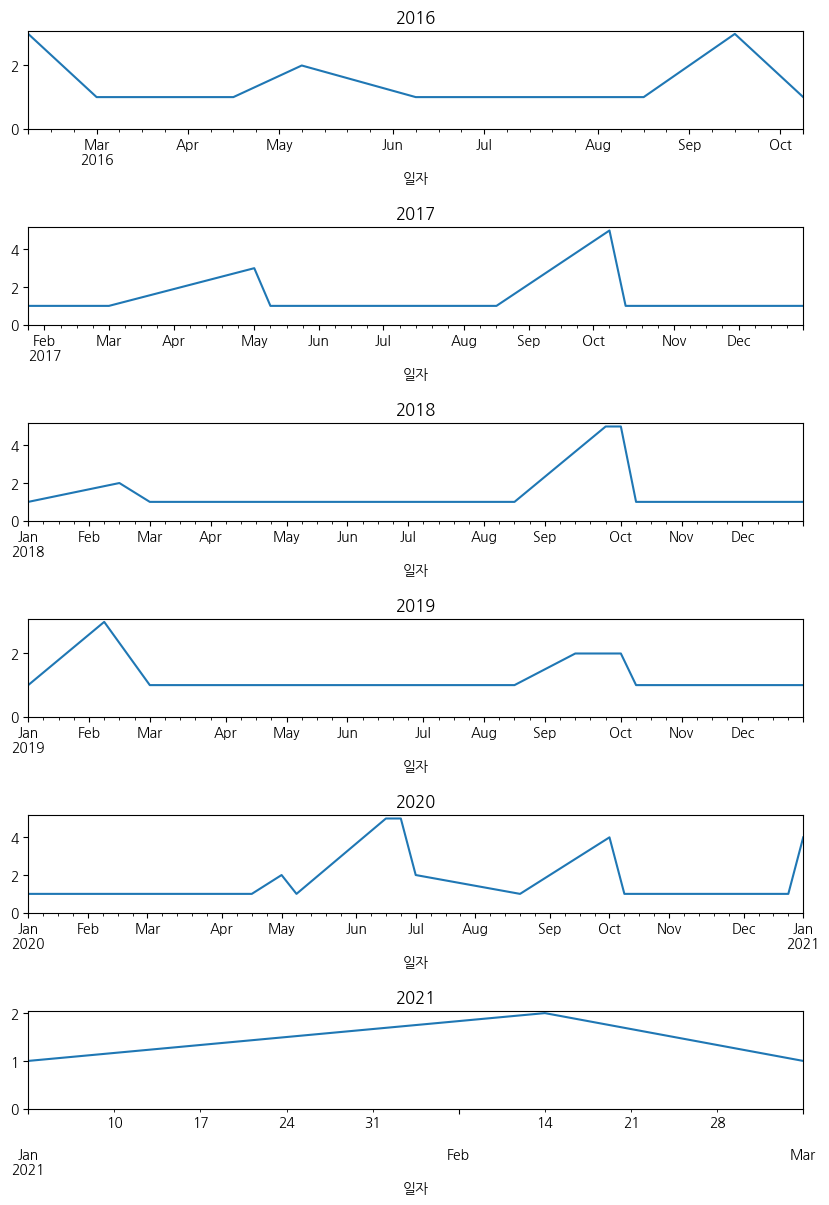

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#행 결측치가 있는 날 합계

null_weekly = df_all[df_all['요일'].isnull()]['일자']
null_weekly = null_weekly.groupby([null_weekly.dt.year, null_weekly.dt.to_period('W')]).count()
fig, axes = plt.subplots(nrows=len(null_weekly.index.levels[0]), ncols=1, figsize=(10, 14))
for i, year in enumerate(null_weekly.index.levels[0]):
    year_data = null_weekly[year]
    year_data.plot(kind='line', ax=axes[i])
    axes[i].set_title(str(year))
    axes[i].set_ylim(bottom=0)
plt.subplots_adjust(hspace=1)
plt.show()


## 텍스트 유사도 묶기

In [8]:
menus = df['중식_메인'].unique()
df_menus = pd.DataFrame(menus, columns=['중식_메인'])
df_menus['중식_메인_카테고리'] = ''

고기 = ['쇠불고기', '갈비', '돈육', '목살', '차돌', '장각허브', '쇠고기', '꿔바로우', '탕수육', 
      '삼겹', '스테이크', '제육', '돈가스', '소세지', '미트', '장조림', '수육', '돈까스', 
      '꼬지', '깐풍기', '보쌈', '족발', '너비아니구이', '함박', '짜장', '탕수', '육전', '오향장육',
      '동파육', '바베큐', '히레', '동그랑', '대패', '깐풍']
해산물 = ['주꾸미', '가자미', '해물', '탕수어', '갈치', '오징어', '적어', '고등어', '꽁치', '코다리',
       '낙지', '장어', '맛살', '동태', '새우', '장어', '유린기', '임연수', '쭈꾸미', '생선',
       '삼치', '유산슬', '굴비', '완자전', '홍어', '열기어']
새고기 = ['오리', '닭', '고기', '치킨', '메추리', '조기', '후라이드']
채소 = ['고구마', '콩나물', '나물', '마파', '고추', '알리오', '채소', '떡', '된장', '감자', '두부',
      '버섯', '달래', '찹쌀', '미소', '바질', '양장피', '샐러드', '야채', '딸기', '토마토', '김치',
      '시금치', '순대', '류산슬', '춘권', '양파', '부추', '깻잎']
유제품 = ['계란', '치즈', '또띠아', '모듬']

for i, menu in df_menus['중식_메인'].iteritems():
    if any(word in menu for word in 고기):
        df_menus.at[i, '중식_메인_카테고리'] = '고기'
    elif any(word in menu for word in 해산물):
        df_menus.at[i, '중식_메인_카테고리'] = '해산물'
    elif any(word in menu for word in 새고기):
        df_menus.at[i, '중식_메인_카테고리'] = '새고기'
    elif any(word in menu for word in 채소):  
        df_menus.at[i, '중식_메인_카테고리'] = '채소'
    elif any(word in menu for word in 유제품):  
        df_menus.at[i, '중식_메인_카테고리'] = '유제품'

df_menus[df_menus['중식_메인_카테고리'].str.len()==0]

,중식_메인,중식_메인_카테고리
342,(,


In [10]:
d_menus = df['석식_메인'].unique()
df_d_menus = pd.Series(d_menus).dropna()
df_d_menus = pd.DataFrame(d_menus, columns=['석식_메인'])
df_d_menus['석식_메인_카테고리'] = ''

고기 = ['쇠불고기', '갈비', '돈육', '목살', '차돌', '장각허브', '쇠고기', '꿔바로우', '탕수육', 
      '삼겹', '스테이크', '제육', '돈가스', '소세지', '미트', '장조림', '수육', '돈까스', 
      '꼬지', '깐풍기', '보쌈', '족발', '너비아니구이', '함박', '짜장', '탕수', '육전', '오향장육',
      '동파육', '바베큐', '히레', '동그랑', '대패', '깐풍', '만두', '고로케', '햄', '사태'
      , '너비아니', '등뼈', '핫도그', '비프', '버거', '꼬치']
해산물 = ['주꾸미', '가자미', '해물', '탕수어', '갈치', '오징어', '적어', '고등어', '꽁치', '코다리',
       '낙지', '장어', '맛살', '동태', '새우', '장어', '유린기', '임연수', '쭈꾸미', '생선',
       '삼치', '유산슬', '굴비', '완자전', '홍어', '열기어', '황태', '명태', '타코', '방어']
새고기 = ['오리', '닭', '고기', '치킨', '메추리', '조기', '후라이드', '코코뱅']
채소 = ['고구마', '콩나물', '나물', '마파', '고추', '알리오', '채소', '떡', '된장', '감자', '두부',
      '버섯', '달래', '찹쌀', '미소', '바질', '양장피', '샐러드', '야채', '딸기', '토마토', '김치',
      '시금치', '순대', '류산슬', '춘권', '양파', '부추', '깻잎', '연근', '가쯔오', '양송이',
      '탕평채', '단호박', '메밀', '옥수수', '딤섬', '쌈', '새싹', '비빔', '팽이', '브로리',
      '퀘사디아', '단무지', '맑은국', '무침', '파국']
유제품 = ['계란', '치즈', '또띠아', '모듬', '버터', '볶음', '빵', '크림', '로제', '자장', '스프',
       '멘보샤', '라볶이', '고르곤', '튀김']

for i, menu in df_d_menus['석식_메인'].iteritems():
    if pd.isna(menu):
        continue
    if any(word in menu for word in 고기):
        df_d_menus.at[i, '석식_메인_카테고리'] = '고기'
    elif any(word in menu for word in 해산물):
        df_d_menus.at[i, '석식_메인_카테고리'] = '해산물'
    elif any(word in menu for word in 새고기):
        df_d_menus.at[i, '석식_메인_카테고리'] = '새고기'
    elif any(word in menu for word in 채소):  
        df_d_menus.at[i, '석식_메인_카테고리'] = '채소'
    elif any(word in menu for word in 유제품):  
        df_d_menus.at[i, '석식_메인_카테고리'] = '유제품'

df_d_menus[df_d_menus['석식_메인_카테고리'].str.len()==0]

,석식_메인,석식_메인_카테고리
120,NaN,


In [11]:
df.head(3)

,Unnamed: 0,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식_밥,중식_국,중식_메인,석식_밥,석식_국,석식_메인,중식계,석식계
0,0,2016-02-01,NaN,월,2601.0,50.0,150.0,238.0,0.0,2401.0,쌀밥,오징어찌개,쇠불고기,쌀밥,육개장,자반고등어구이,1039.0,331.0
1,1,2016-02-02,NaN,화,2601.0,50.0,173.0,319.0,0.0,2378.0,쌀밥,김치찌개,가자미튀김,콩나물밥,어묵국,유산슬,867.0,560.0
2,2,2016-02-03,휴무-2,수,2601.0,56.0,180.0,111.0,0.0,2365.0,카레덮밥,팽이장국,치킨핑거,쌀밥,청국장찌개,황태양념구이,1017.0,573.0


In [12]:
df_menus.head(3)

,중식_메인,중식_메인_카테고리
0,쇠불고기,고기
1,가자미튀김,해산물
2,치킨핑거,새고기


In [13]:
df = pd.merge(df, df_menus, how='left', on='중식_메인', suffixes=('_df', '_df_menus'))

In [14]:
df = pd.merge(df, df_d_menus, how='left', on='석식_메인', suffixes=('_df', '_df_d_menus'))
df.head(3)

,Unnamed: 0,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식_밥,중식_국,중식_메인,석식_밥,석식_국,석식_메인,중식계,석식계,중식_메인_카테고리,석식_메인_카테고리
0,0,2016-02-01,NaN,월,2601.0,50.0,150.0,238.0,0.0,2401.0,쌀밥,오징어찌개,쇠불고기,쌀밥,육개장,자반고등어구이,1039.0,331.0,고기,해산물
1,1,2016-02-02,NaN,화,2601.0,50.0,173.0,319.0,0.0,2378.0,쌀밥,김치찌개,가자미튀김,콩나물밥,어묵국,유산슬,867.0,560.0,해산물,해산물
2,2,2016-02-03,휴무-2,수,2601.0,56.0,180.0,111.0,0.0,2365.0,카레덮밥,팽이장국,치킨핑거,쌀밥,청국장찌개,황태양념구이,1017.0,573.0,새고기,해산물


In [16]:
df['공휴일'].unique()

array([nan, '휴무-2', '휴무-1', '휴무+2', '휴무+1'], dtype=object)

In [20]:
#휴무일 숫자로 변경하기
df['공휴일'] = df['공휴일'].astype(str).fillna('')
df.loc[df['공휴일'].str.contains('휴무[-+]?2'), '공휴일'] = 2
df.loc[df['공휴일'].str.contains('휴무[-+]?1'), '공휴일'] = 1
df.loc[df['공휴일']=='', '공휴일']=0
df

,Unnamed: 0,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식_밥,중식_국,중식_메인,석식_밥,석식_국,석식_메인,중식계,석식계,중식_메인_카테고리,석식_메인_카테고리
0,0,2016-02-01,0,월,2601.0,50.0,150.0,238.0,0.0,2401.0,쌀밥,오징어찌개,쇠불고기,쌀밥,육개장,자반고등어구이,1039.0,331.0,고기,해산물
1,1,2016-02-02,0,화,2601.0,50.0,173.0,319.0,0.0,2378.0,쌀밥,김치찌개,가자미튀김,콩나물밥,어묵국,유산슬,867.0,560.0,해산물,해산물
2,2,2016-02-03,2,수,2601.0,56.0,180.0,111.0,0.0,2365.0,카레덮밥,팽이장국,치킨핑거,쌀밥,청국장찌개,황태양념구이,1017.0,573.0,새고기,해산물
3,3,2016-02-04,1,목,2601.0,104.0,220.0,355.0,0.0,2277.0,쌀밥,쇠고기무국,주꾸미볶음,미니김밥,우동,멕시칸샐러드,978.0,525.0,해산물,채소
4,4,2016-02-05,1,금,2601.0,278.0,181.0,34.0,0.0,2142.0,쌀밥,떡국,돈육씨앗강정,쌀밥,차돌박이찌개,닭갈비,925.0,330.0,고기,고기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1250,2021-04-05,0,월,2973.0,125.0,174.0,704.0,331.0,2343.0,쌀밥,쇠고기미역국,춘천닭갈비,흑미밥,돈육고추장찌개,갈치구이,NaN,NaN,고기,해산물
1251,1251,2021-04-06,0,화,2973.0,76.0,170.0,636.0,364.0,2363.0,쌀밥,순두부백탕,매콤소갈비찜,추가밥,짬뽕*생면,수제찹쌀꿔바로우,NaN,NaN,고기,고기
1252,1252,2021-04-07,0,수,2973.0,96.0,214.0,1.0,334.0,2329.0,쌀밥,냉이국,돈육간장불고기,단호박카레라이스,시금치된장국,소떡소떡,NaN,NaN,고기,채소
1253,1253,2021-04-08,0,목,2973.0,105.0,238.0,509.0,324.0,2306.0,쌀밥,맑은떡국,가자미구이,흑미밥,어묵매운탕,쇠고기숙주볶음,NaN,NaN,해산물,고기


In [15]:
import seaborn as sns
sns.heatmap(df_encoded.corr(), annot =True, fmt = ',.2f')

NameError: ignored

## 인코딩 해주기
* 주기성을 지키기 위해 일자는 코사인 인코딩으로 진행
* 메인 카테고리는 원핫인코딩 진행

In [22]:
df = df[['일자', '공휴일', '요일', '본사정원수', '본사휴가자수', '본사출장자수','본사시간외근무명령서승인건수', 
    '본사근무자수','중식계', '석식계', '중식_메인_카테고리', '석식_메인_카테고리']]
df.head(3)

,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,본사근무자수,중식계,석식계,중식_메인_카테고리,석식_메인_카테고리
0,2016-02-01,0,월,2601.0,50.0,150.0,238.0,2401.0,1039.0,331.0,고기,해산물
1,2016-02-02,0,화,2601.0,50.0,173.0,319.0,2378.0,867.0,560.0,해산물,해산물
2,2016-02-03,2,수,2601.0,56.0,180.0,111.0,2365.0,1017.0,573.0,새고기,해산물


In [ ]:
df['석식_메인_카테고리'].unique()

array(['해산물', '채소', '고기', '새고기', '유제품', ''], dtype=object)

In [23]:
df_encoded = df.copy()

In [24]:
#요일 인코딩
from sklearn.preprocessing import LabelEncoder

# main_dinner = df_encoded['중식_메인_카테고리'].values
# main_lunch = df_encoded['석식_메인_카테고리'].values
day = df_encoded['요일'].values

le = LabelEncoder()
# df_encoded['중식_메인_카테고리'] = le.fit_transform(main_dinner)
# df_encoded['석식_메인_카테고리'] = le.fit_transform(main_lunch)
df_encoded['요일'] = le.fit_transform(day)

df_encoded

,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,본사근무자수,중식계,석식계,중식_메인_카테고리,석식_메인_카테고리
0,2016-02-01,0,3,2601.0,50.0,150.0,238.0,2401.0,1039.0,331.0,고기,해산물
1,2016-02-02,0,4,2601.0,50.0,173.0,319.0,2378.0,867.0,560.0,해산물,해산물
2,2016-02-03,2,2,2601.0,56.0,180.0,111.0,2365.0,1017.0,573.0,새고기,해산물
3,2016-02-04,1,1,2601.0,104.0,220.0,355.0,2277.0,978.0,525.0,해산물,채소
4,2016-02-05,1,0,2601.0,278.0,181.0,34.0,2142.0,925.0,330.0,고기,고기
...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2021-04-05,0,3,2973.0,125.0,174.0,704.0,2343.0,NaN,NaN,고기,해산물
1251,2021-04-06,0,4,2973.0,76.0,170.0,636.0,2363.0,NaN,NaN,고기,고기
1252,2021-04-07,0,2,2973.0,96.0,214.0,1.0,2329.0,NaN,NaN,고기,채소
1253,2021-04-08,0,1,2973.0,105.0,238.0,509.0,2306.0,NaN,NaN,해산물,고기


In [ ]:
import pandas as pd
import numpy as np

start_date = '2016-02-01'
end_date = '2021-04-19'
date_range = pd.date_range(start_date, end_date, freq='B') # 평일 데이터만 추출
date_encoded = pd.DataFrame({'일자': date_range, '값': np.random.rand(len(date_range))})

day_diff = (date_encoded['일자'] - pd.to_datetime(start_date)).dt.days
date_encoded['코사인_일자'] = np.cos(2 * np.pi * day_diff / 365)
date_encoded['일자'] = pd.to_datetime(date_encoded['일자'])
date_encoded

,일자,값,코사인_일자
0,2016-02-01,0.656092,1.000000
1,2016-02-02,0.107378,0.999852
2,2016-02-03,0.359957,0.999407
3,2016-02-04,0.741357,0.998667
4,2016-02-05,0.276710,0.997630
...,...,...,...
1356,2021-04-13,0.548508,0.309017
1357,2021-04-14,0.118127,0.292600
1358,2021-04-15,0.682155,0.276097
1359,2021-04-16,0.499544,0.259512


In [ ]:
df_encoded['일자'] = pd.to_datetime(df_encoded['일자'])
df_encoded = pd.merge(df_encoded, date_encoded, how='left', on='일자')

In [ ]:
df_encoded = df_encoded[['코사인_일자', '공휴일', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '본사근무자수', '중식계', '석식계', '중식_메인_카테고리', '석식_메인_카테고리']]
df_encoded.head(3)

,코사인_일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식계,석식계,중식_메인_카테고리,석식_메인_카테고리
0,1.000000,4,3,2601.0,50.0,150.0,238.0,0.0,2401.0,1039.0,331.0,1,5
1,0.999852,4,4,2601.0,50.0,173.0,319.0,0.0,2378.0,867.0,560.0,5,5
2,0.999407,3,2,2601.0,56.0,180.0,111.0,0.0,2365.0,1017.0,573.0,2,5


In [ ]:
df_encoded = df_encoded.rename(columns={'코사인_일자':'일자'})
df_encoded.head(3)

,일자,공휴일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,본사근무자수,중식계,석식계,중식_메인_카테고리,석식_메인_카테고리
0,1.000000,4,3,2601.0,50.0,150.0,238.0,0.0,2401.0,1039.0,331.0,1,5
1,0.999852,4,4,2601.0,50.0,173.0,319.0,0.0,2378.0,867.0,560.0,5,5
2,0.999407,3,2,2601.0,56.0,180.0,111.0,0.0,2365.0,1017.0,573.0,2,5


## ML 적용

In [ ]:
#X, y 분리
label = ['중식계', '석식계']
y = df_encoded[label]
X = df_encoded.drop(columns=label)

X_train = X.iloc[:1205]
X_test = X.iloc[1205:]
y_train = y.iloc[:1205]
y_test = y.iloc[1205:]

y_train.head(3)

,중식계,석식계
0,1039.0,331.0
1,867.0,560.0
2,1017.0,573.0


In [ ]:
X.columns

Index(['일자', '공휴일', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '본사근무자수', '중식_메인_카테고리', '석식_메인_카테고리'],
      dtype='object')

In [ ]:
lunch_X_train = X_train[['일자', '공휴일', '요일', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
        '본사근무자수', '중식_메인_카테고리']]
lunch_X_test = X_test[['일자', '공휴일', '요일', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
        '본사근무자수', '중식_메인_카테고리']]
lunch_y_train = y_train['중식계']
lunch_y_test = y_test['중식계']

In [ ]:
lunch_X_train

,일자,공휴일,요일,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,본사근무자수,중식_메인_카테고리
0,1.000000,4,3,50.0,150.0,238.0,2401.0,1
1,0.999852,4,4,50.0,173.0,319.0,2378.0,5
2,0.999407,3,2,56.0,180.0,111.0,2365.0,2
3,0.998667,2,1,104.0,220.0,355.0,2277.0,5
4,0.997630,2,0,278.0,181.0,34.0,2142.0,1
...,...,...,...,...,...,...,...,...
1200,0.985220,4,2,75.0,198.0,4.0,2319.0,1
1201,0.988023,4,1,92.0,231.0,462.0,2309.0,1
1202,0.990532,4,0,255.0,248.0,1.0,2177.0,2
1203,0.996298,4,3,107.0,153.0,616.0,2396.0,1


In [ ]:
dinner_set = df_encoded.iloc[:1205]
dinner_set = dinner_set[dinner_set['석식계']!=0]
dinner_X_train = dinner_set[['일자', '공휴일', '요일', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
        '본사근무자수', '석식_메인_카테고리']]
dinner_y_train = dinner_set['석식계']

In [ ]:
dinner_X_train

,일자,공휴일,요일,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,본사근무자수,석식_메인_카테고리
0,1.000000,4,3,50.0,150.0,238.0,2401.0,5
1,0.999852,4,4,50.0,173.0,319.0,2378.0,5
2,0.999407,3,2,56.0,180.0,111.0,2365.0,5
3,0.998667,2,1,104.0,220.0,355.0,2277.0,4
4,0.997630,2,0,278.0,181.0,34.0,2142.0,1
...,...,...,...,...,...,...,...,...
1200,0.985220,4,2,75.0,198.0,4.0,2319.0,4
1201,0.988023,4,1,92.0,231.0,462.0,2309.0,5
1202,0.990532,4,0,255.0,248.0,1.0,2177.0,1
1203,0.996298,4,3,107.0,153.0,616.0,2396.0,5


In [ ]:
dinner_X_test = X_test[['일자', '공휴일', '요일', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '본사근무자수', '석식_메인_카테고리']]
dinner_y_test = y_test['석식계']

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

num_estimators = [100, 500, 1000]
learn_rates = [0.1, 1]
max_depths = [2, 4]
# min_samples_leaf = [5, 10]
min_samples_split = [2, 5]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
            #   'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, return_train_score=True, scoring='neg_mean_absolute_error')
grid_search.fit(lunch_X_train, lunch_y_train)

lunch_gb = GradientBoostingRegressor(**grid_search.best_params_)
lunch_gb.fit(lunch_X_train, lunch_y_train)
lunch_y_preds = lunch_gb.predict(lunch_X_test)

CPU times: user 1min 11s, sys: 105 ms, total: 1min 11s
Wall time: 1min 21s


In [ ]:
sub['중식계'] = lunch_y_preds
sub

,일자,중식계,석식계
0,2021-01-27,1018.053172,348.330894
1,2021-01-28,1018.016724,432.367194
2,2021-01-29,677.794498,73.980041
3,2021-02-01,1234.598656,509.556094
4,2021-02-02,1036.008491,471.853052
5,2021-02-03,954.832344,343.279985
6,2021-02-04,916.360147,423.816578
7,2021-02-05,669.162095,300.924152
8,2021-02-08,1262.996050,589.747634
9,2021-02-09,1027.183433,482.602520


In [ ]:
%%time

num_estimators = [100, 500, 1000]
learn_rates = [0.1, 1]
max_depths = [2, 4]
# min_samples_leaf = [5, 10]
min_samples_split = [2, 5]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
            #   'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, return_train_score=True, scoring='neg_mean_absolute_error')
grid_search.fit(dinner_X_train, dinner_y_train)

dinner_gb = GradientBoostingRegressor(**grid_search.best_params_)
dinner_gb.fit(dinner_X_train, dinner_y_train)
dinner_y_preds = dinner_gb.predict(dinner_X_test)

CPU times: user 1min 8s, sys: 83.6 ms, total: 1min 8s
Wall time: 1min 13s


In [ ]:
sub['석식계'] = dinner_y_preds
sub

,일자,중식계,석식계
0,2021-01-27,1018.053172,436.961844
1,2021-01-28,1018.016724,515.960648
2,2021-01-29,677.794498,305.447520
3,2021-02-01,1234.598656,571.416539
4,2021-02-02,1036.008491,544.120062
5,2021-02-03,954.832344,491.177974
6,2021-02-04,916.360147,534.613593
7,2021-02-05,669.162095,403.051550
8,2021-02-08,1262.996050,611.833897
9,2021-02-09,1027.183433,549.877421


In [ ]:
sub.to_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/제출용/훈영_성능개선1차.csv', index=False)